/Users/kyurishin/aiffel/data_represent/image/newyork.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>


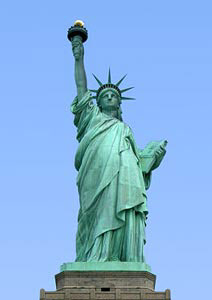

In [2]:
from PIL import Image, ImageColor
import os
img_path = os.getenv("HOME") + "/aiffel/data_represent/image/newyork.jpg"
img = Image.open(img_path)
print(img_path)
print(type(img))
img

Pillow의 Image.open()이라는 메소드를 통해 이미지 파일을 open하였습니다.     
이렇게 해서 얻어진 오브젝트 img는 PIL.JpegImagePlugin.JpegImageFile 라는 타입을 가지고 있습니다.

In [4]:
img.size

(212, 300)

In [7]:
W,H = img.size
print((W,H))

(212, 300)


In [9]:
print(img.format)
print(img.size)
print(img.mode)

JPEG
(212, 300)
RGB


## 3. 이미지 자르기

이미지를 자를 때에는 .crop() 메소드를 이용합니다.     
인자로 튜플값을 받고 x0, y0, x1, y1 가로 세로의 시작점과 가로,세로의 종료점 총 4개를 입력해 줍니다.

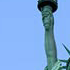

In [11]:
img.crop((30,30,100,100))

In [13]:
# 새로운 이미지 파일명
cropped_img_path = os.getenv("HOME") + "/aiffel/data_represent/image/croped_img.jpg"
img.crop((30,30,100,100)).save(cropped_img_path)

In [34]:
# 이미지 파일을 행렬로 변환하기 
import numpy as np

img_arr = np.array(img)
print(type(img))
print(type(img_arr))
print(img_arr.shape)
print(img_arr.ndim)

<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'numpy.ndarray'>
(300, 212, 3)
3


In [19]:
img_one = Image.open(img_path).convert('1')
img_one = os.getenv("HOME") + "/aiffel/data_represent/image/one_bit.jpg"
img.save(img_one)

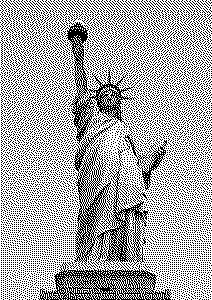

In [33]:
img_g = Image.open(img_path).convert('1')
img_g

In [24]:
import numpy as np

img_g_arr = np.array(img_g)
print(type(img_g_arr))
print(img_g_arr.shape)
print(img_g_arr.ndim)

<class 'numpy.ndarray'>
(300, 212)
2


In [26]:
img_g_arr

array([[ True,  True, False, ...,  True, False,  True],
       [False,  True,  True, ...,  True,  True,  True],
       [ True,  True, False, ..., False,  True, False],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True, False,  True, ...,  True, False,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

## getcolour( ): 이미지의 RGB 값 정보 불러오기

In [35]:
red = ImageColor.getcolor('RED','RGB')
reda = ImageColor.getcolor('red','RGBA')
yellow = ImageColor.getcolor('yellow','RGB')
print(red)
print(reda)
print(yellow)

(255, 0, 0)
(255, 0, 0, 255)
(255, 255, 0)


## 6-9. 구조화된 데이터란?

우리는 데이터를 변수에 저장해서 프로그래밍을 하는데요, **숫자나 텍스트 같은 데이터는 number나 string 형태로 데이터를 저장**합니다. 그리고 **한 번에 연속열을 저장할 때는 배열이라는 자료 구조를 사용**했습니다. 배열에는 대표적으로 리스트, 튜플이 있고 좀더 간편하게 선형대수를 표현하기 위한 배열로 우리는 NumPy의 ndarray를 사용했어요.

자 그럼 이런 형태의 데이터는 어떨까요? 국제전화 국가 번호 데이터를 저장한다고 해 볼게요.

Country_PhoneNumber
- Korea: 82
- America: 1
- Swiss: 41
- Italy: 39
- Japan: 81
- China: 86
- Rusia: 7

이런 형태의 데이터는 어떻게 저장하면 좋을까요? 위 데이터에서 한국 국가번호 값 82를 찾기 위해서 데이터에 번호를 매겨서 인덱스 형태로 찾는 게 좋을까요, 아니면 한국을 쳤을 때 나오는 게 좋을까요? 한국이란 단어로 찾는 게 좋겠죠? 이렇게 **어떤 데이터의 값을 찾을 때 인덱스가 아닌 "한국", "미국" 등 키(key)를 사용해 데이터에 접근하는 데이터 구조**를 **hash**라고 합니다.

> Hash란 Key와 Value로 구성되어 있는 자료 구조로 두개의 열만 갖지만 수많은 행을 가지는 구조체입니다.

해시는 다른 프로그래밍언어에서는 매핑(mapping), 연관배열(associative array) 등으로 불리고    
파이썬에서는 "딕셔너리(dictionary)" 또는 dict로 알려져 있습니다.    
파이썬 딕셔너리는 중괄호{}를 이용하고 키 : 값의 형태로 각각 나타냅니다.

In [36]:
# 파이썬 dict 로 표현한 전화번호부입니다. 

Country_PhoneNumber = {'Korea': 82, 
                       'America': 1, 
                       'Swiss': 41, 
                       'Italy': 39, 
                       'Japan': 81, 
                       'China': 86, 
                       'Rusia': 7}

Country_PhoneNumber['Korea']  

# 키를 가지고 값을 조회할 수 있습니다.

82

## 6-10. 간단한 딕셔너리(dictionary)를 활용한 판타지 게임 logic 설계

딕셔너리를 이용해 몇 가지 예제를 풀어볼게요.     
당신은 게임회사에 취직해 판타지 게임을 위한 로직을 만들고 있습니다.

<img src= "https://aiffelstaticprd.blob.core.windows.net/media/images/f-11-9.1.max-800x600.png" width = 500>

플레이어가 보물상자를 얻었을 때, 보물상자 안에 있는 물품과, 각 물품을 통해 얻은 은화를 보여주는 프로그램을 만든다고 해 볼게요.    
보물상자에 다음과 같은 물건이 들어 있을 때, 그리고 각 물품은 게임세계의 돈인 은화로 거래될 수 있습니다.

* 물품을 보여주는 함수

In [38]:
treasure_box = {'rope':2, 
                'apple':10, 
                'torch': 6, 
                'gold coin': 50, 
                'knife': 1, 
                'arrow': 30}

def display_stuff(treasure_box):
    print("Congraturation!! you got a treasure box")
    for k, v in treasure_box.items():
        print("you have {} {}pcs".format(k, v))
display_stuff(treasure_box)

Congraturation!! you got a treasure box
you have rope 2pcs
you have apple 10pcs
you have torch 6pcs
you have gold coin 50pcs
you have knife 1pcs
you have arrow 30pcs


* 물품을 통해 얻을 은화를 보여주는 함수

In [40]:
coin_per_treasure = {'rope':1,
        'apple':2,
        'torch': 2,
        'gold coin': 5, 
        'knife': 30,
        'arrow': 1}

def total_silver(treasure_box, coin_per_treasure):
    total_coin = 0
    for treasure in treasure_box:
        coin = coin_per_treasure[treasure] * treasure_box[treasure]
        print("{} : {}coins/pcs * {}pcs = {} coins".format(
          treasure, coin_per_treasure[treasure], treasure_box[treasure], coin))
        total_coin += coin
    print('total_coin : ', total_coin)
total_silver(treasure_box, coin_per_treasure)

rope : 1coins/pcs * 2pcs = 2 coins
apple : 2coins/pcs * 10pcs = 20 coins
torch : 2coins/pcs * 6pcs = 12 coins
gold coin : 5coins/pcs * 50pcs = 250 coins
knife : 30coins/pcs * 1pcs = 30 coins
arrow : 1coins/pcs * 30pcs = 30 coins
total_coin :  344


보물상자안의 물품과 개수와 은화를 각각의 dictionary 형태로 저장하고, 동일한 단어를 키로 사용해서 각각의 데이터 값을 매칭했습니다.    
데이터를 하나의 변수에 저장할 수도 있습니다. "딕셔너리의 딕셔너리" 형태에요.

In [42]:
treasure_box = {'rope': {'coin': 1, 'pcs': 2},
                'apple': {'coin': 2, 'pcs': 10},
                'torch': {'coin': 2, 'pcs': 6},
                'gold coin': {'coin': 5, 'pcs': 50},
                'knife': {'coin': 1, 'pcs': 30}}
treasure_box['rope']

{'coin': 1, 'pcs': 2}

So, 구조화된 데이터란?  

위에 보는 treasure_box 에 포함된 5개의 데이터는 내부적으로 coin과 pcs라는 내부 구조를 가집니다.     
이렇게 **데이터 내부에 자체적인 서브 구조를 가지는 데이터**를 **구조화된 데이터**라고 하겠습니다.      
이런 데이터는 나중에 살펴보겠지만, 테이블(table) 형태로 전개됩니다.     
위의 treasure_box 데이터는 5개의 행(row), 2개의 열(column)을 가진 데이터가 될 것입니다.

이런 경우엔 위에 작성했던 **displaystuff()와 totalsilver()** 함수를 어떻게 작성하면 될까요? 직접 코딩 해보세요.

In [45]:
def display_stuff(treasure_box):
    print("Congraturation!! you got a treasure box")
    for k, v in treasure_box.items():
        print("you have {} {}pcs".format(k, v))
display_stuff(treasure_box)

Congraturation!! you got a treasure box
you have rope {'coin': 1, 'pcs': 2}pcs
you have apple {'coin': 2, 'pcs': 10}pcs
you have torch {'coin': 2, 'pcs': 6}pcs
you have gold coin {'coin': 5, 'pcs': 50}pcs
you have knife {'coin': 1, 'pcs': 30}pcs


In [ ]:
coin_per_treasure = {'rope':1,
        'apple':2,
        'torch': 2,
        'gold coin': 5, 
        'knife': 30,
        'arrow': 1}

def total_silver(treasure_box, coin_per_treasure):
    total_coin = 0
    for treasure in treasure_box:
        coin = coin_per_treasure[treasure] * treasure_box[treasure]
        print("{} : {}coins/pcs * {}pcs = {} coins".format(
          treasure, coin_per_treasure[treasure], treasure_box[treasure], coin))
        total_coin += coin
    print('total_coin : ', total_coin)
total_silver(treasure_box, coin_per_treasure)

In [52]:
def display_stuff(treasure_box):
    ## type your code
    print('Congratulations! You got a treasure box!')
    for treasure in treasure_box:
        print("You have {} : {} pcs".format(treasure,treasure_box[treasure]['pcs']))
display_stuff(treasure_box)

Congratulations! You got a treasure box!
You have rope : 2 pcs
You have apple : 10 pcs
You have torch : 6 pcs
You have gold coin : 50 pcs
You have knife : 30 pcs


In [54]:
def total_silver(treasure_box, coin_per_treasure):
    ## type your code
    total_coin = 0
    for treasure in treasure_box:
        coin = coin_per_treasure[treasure] * treasure_box[treasure]['pcs']
        total_coin += coin
    print('total coin: ', total_coin)
total_silver(treasure_box, coin_per_treasure)

total coin:  1184
